In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

In [2]:
DEVICE = 'cuda:0'
MAX_EPOCHS = 100
EXPECTED_N = 10000

## Torus model

In [3]:
def model(params, center = np.array([0.5, 0.5])):
    a, b = params['a'], params['b']
    r = ((a-center[0])**2+(b-center[1])**2)**0.5  # Return radial distance from center
    x = np.array([r])
    return dict(x=x)

def noise(obs, params, noise = np.array([0.01])):
    x = obs['x']
    n = np.random.randn(*x.shape)*noise
    return dict(x = x + n)

par0 = dict(a=0.2, b=0.5)
obs0 = model(par0)  # Using Asimov data

In [4]:
cache = swyft.MemoryCache(params = ['a', 'b'], obs_shapes = dict(x=(1,)))

Creating new cache.


In [5]:
prior = swyft.Prior({"a": ["uniform", 0., 1.], "b": ["uniform",  0., 1.]})

## Inference

In [23]:
s = swyft.SWYFT(model, noise, prior, cache, obs0, device = DEVICE)

N = 10000
Round: 1
No new simulator runs required.
No simulations required.
n_features = 1
Start training
LR iteration 0
Validation loss: 2.9957723079189176
Validation loss: 2.744684165523898
Validation loss: 2.6579614993064635
Validation loss: 2.5936493335231656
Validation loss: 2.5874739462329495
Validation loss: 2.573186412934334
Validation loss: 2.5397277878176783
Validation loss: 2.5506713159622683
Total epochs: 8
LR iteration 1
Validation loss: 2.5166709423065186
Validation loss: 2.50210395936043
Validation loss: 2.5312930691626763
Total epochs: 3
LR iteration 2
Validation loss: 2.4899517720745457
Validation loss: 2.4796413606212986
Validation loss: 2.4897900550596175
Total epochs: 3


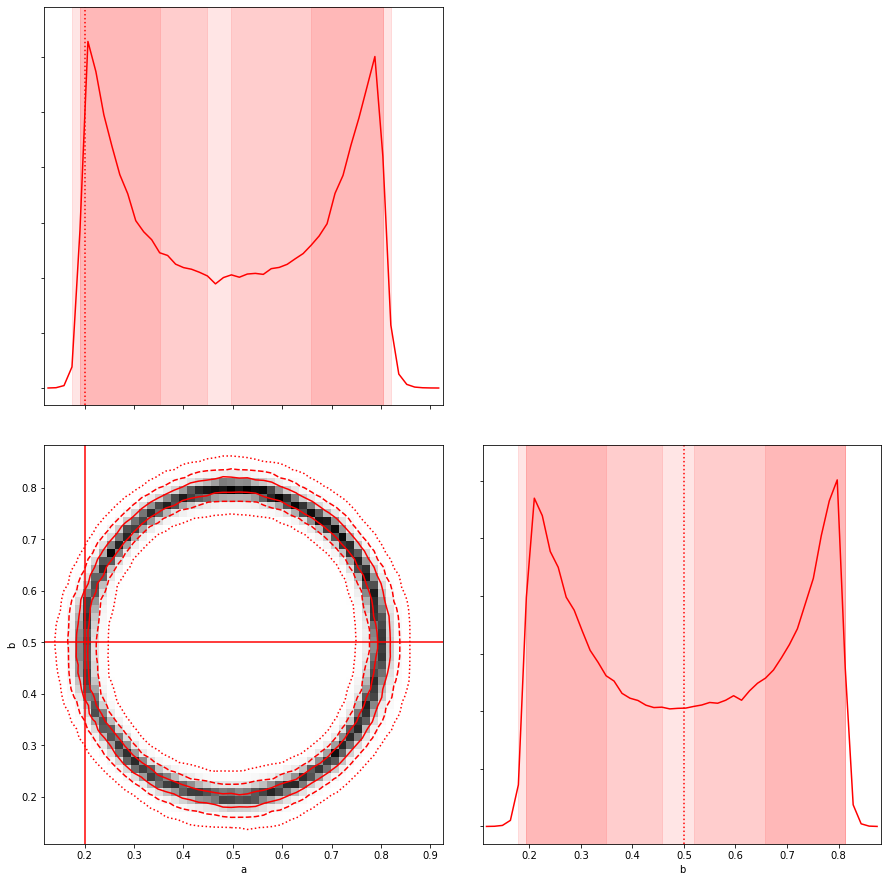

In [24]:
s.infer2d(N = 10000, 
          train_args = dict(batch_size=32, lr_schedule = [1e-3, 3e-4, 1e-4]),
          tail_args = dict(n_hidden = 256, p = 0.1, n_tail_features = 10, tail_features = False)
         )
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 20000
Round: 2


Simulate:   1%|          | 102/13807 [00:00<00:13, 1012.85it/s]

Adding 13807 new samples. Run simulator!


Simulate: 100%|██████████| 13807/13807 [00:13<00:00, 1007.04it/s]


n_features = 1
Start training
LR iteration 0
Validation loss: 2.8139101151497132
Validation loss: 2.686919573814638
Validation loss: 2.6629615906746156
Validation loss: 2.6725237254173524
Total epochs: 4
LR iteration 1
Validation loss: 2.6071206638889928
Validation loss: 2.5818924173232047
Validation loss: 2.5950681221100593
Total epochs: 3
LR iteration 2
Validation loss: 2.5851121352564905
Validation loss: 2.581322410414296
Validation loss: 2.5848932958418325
Total epochs: 3


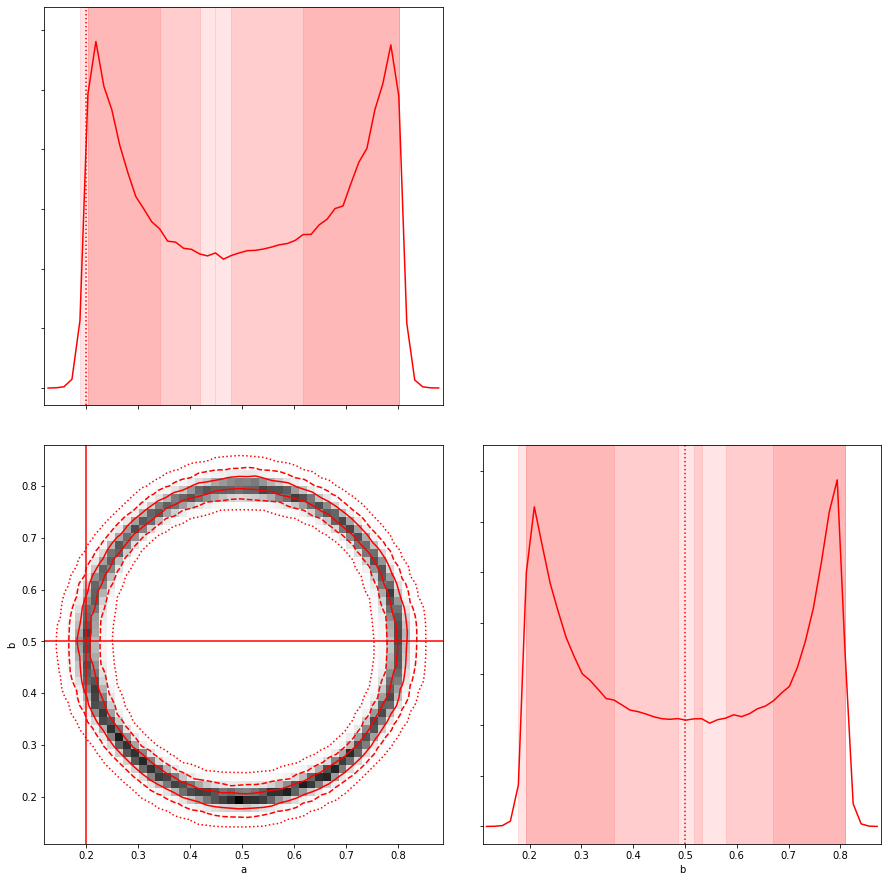

In [25]:
s.infer2d(N = 20000, 
          train_args = dict(batch_size=32, lr_schedule = [1e-3, 3e-4, 1e-4]),
          tail_args = dict(n_hidden = 256, p = 0.1, n_tail_features = 10, tail_features = False)
         )
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 10000
Round: 3
No new simulator runs required.
No simulations required.
n_features = 1
Start training
LR iteration 0
Validation loss: 3.1187836739324752
Validation loss: 2.8873079746000228
Validation loss: 2.7911078622264247
Validation loss: 2.7480010063417497
Validation loss: 2.720397372399607
Validation loss: 2.698505155501827
Validation loss: 2.660007123024233
Validation loss: 2.6608993238018406
Total epochs: 8
LR iteration 1
Validation loss: 2.622173470835532
Validation loss: 2.604279533509285
Validation loss: 2.6225483340601765
Total epochs: 3
LR iteration 2
Validation loss: 2.611643737362277
Validation loss: 2.5790716678865495
Validation loss: 2.5705427046745055
Validation loss: 2.592621280301002
Total epochs: 4


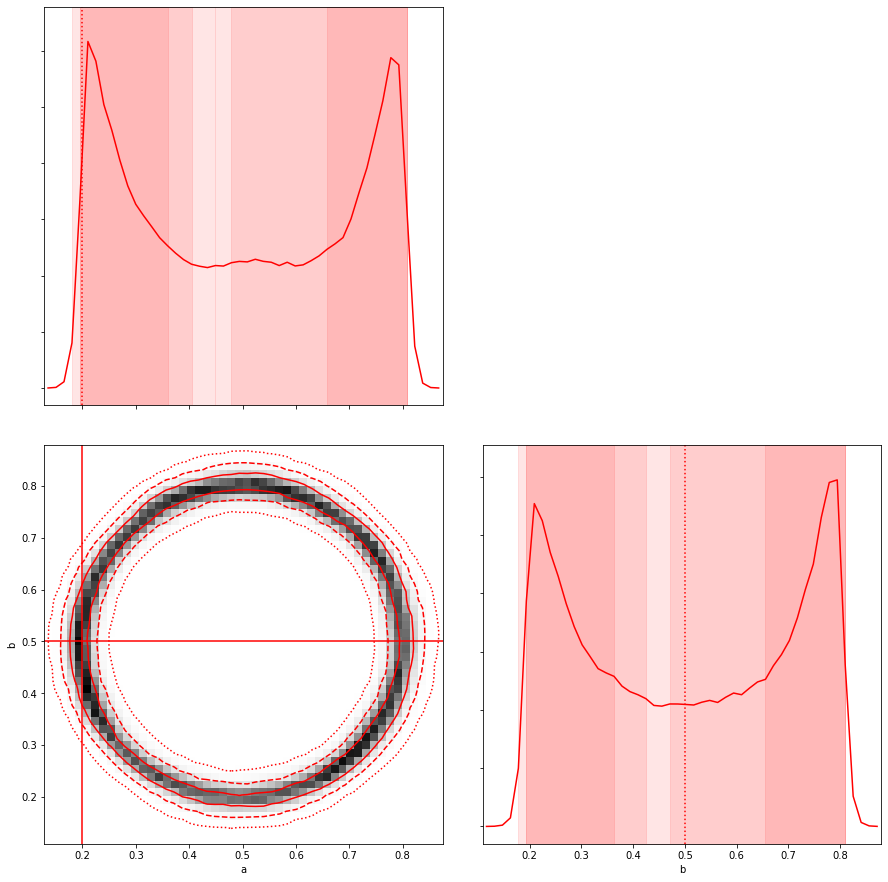

In [27]:
s.infer2d(N = 10000, 
          train_args = dict(batch_size=32, lr_schedule = [1e-3, 3e-4, 1e-4]),
          tail_args = dict(n_hidden = 256, p = 0.1, n_tail_features = 1, tail_features = True)
         )
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 10000
Round: 4


Simulate: 100%|██████████| 15/15 [00:00<00:00, 1057.19it/s]

Adding 15 new samples. Run simulator!


n_features = 1
Start training
LR iteration 0
Validation loss: 3.1161588271458944
Validation loss: 2.9449434439341227
Validation loss: 2.838303812344869
Validation loss: 2.800499121348063
Validation loss: 2.761088498433431
Validation loss: 2.7534518162409465
Validation loss: 2.6763463179270426
Validation loss: 2.6868004242579144
Total epochs: 8
LR iteration 1
Validation loss: 2.6218794504801433
Validation loss: 2.641584793726603
Total epochs: 2
LR iteration 2
Validation loss: 2.6128663063049316
Validation loss: 2.6047417163848876
Validation loss: 2.599176859855652
Validation loss: 2.582650891939799
Validation loss: 2.613639752070109
Total epochs: 5


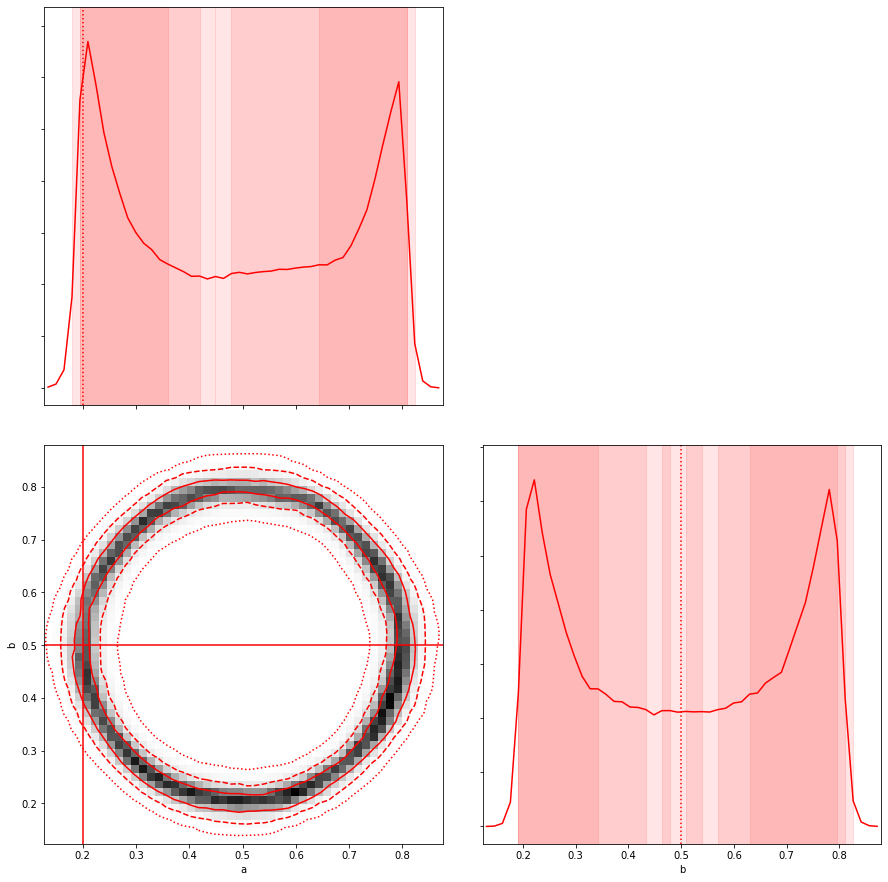

In [28]:
s.infer2d(N = 10000, 
          train_args = dict(batch_size=32, lr_schedule = [1e-3, 3e-4, 1e-4]),
          tail_args = dict(n_hidden = 256, p = 0.1, n_tail_features = 10, tail_features = True)
         )
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 10000
Round: 6


Simulate:   0%|          | 0/2 [00:00<?, ?it/s]

Adding 2 new samples. Run simulator!


Simulate: 100%|██████████| 2/2 [00:00<00:00, 775.79it/s]


n_features = 1
Start training
LR iteration 0
Validation loss: 3.048017863304384
Validation loss: 2.801062160922635
Validation loss: 2.709765734211091
Validation loss: 2.716336942488147
Total epochs: 4
LR iteration 1
Validation loss: 2.63676877175608
Validation loss: 2.6158041184948337
Validation loss: 2.6289137486488587
Total epochs: 3
LR iteration 2
Validation loss: 2.606358189736643
Validation loss: 2.5932718169304634
Validation loss: 2.6023748997719056
Total epochs: 3


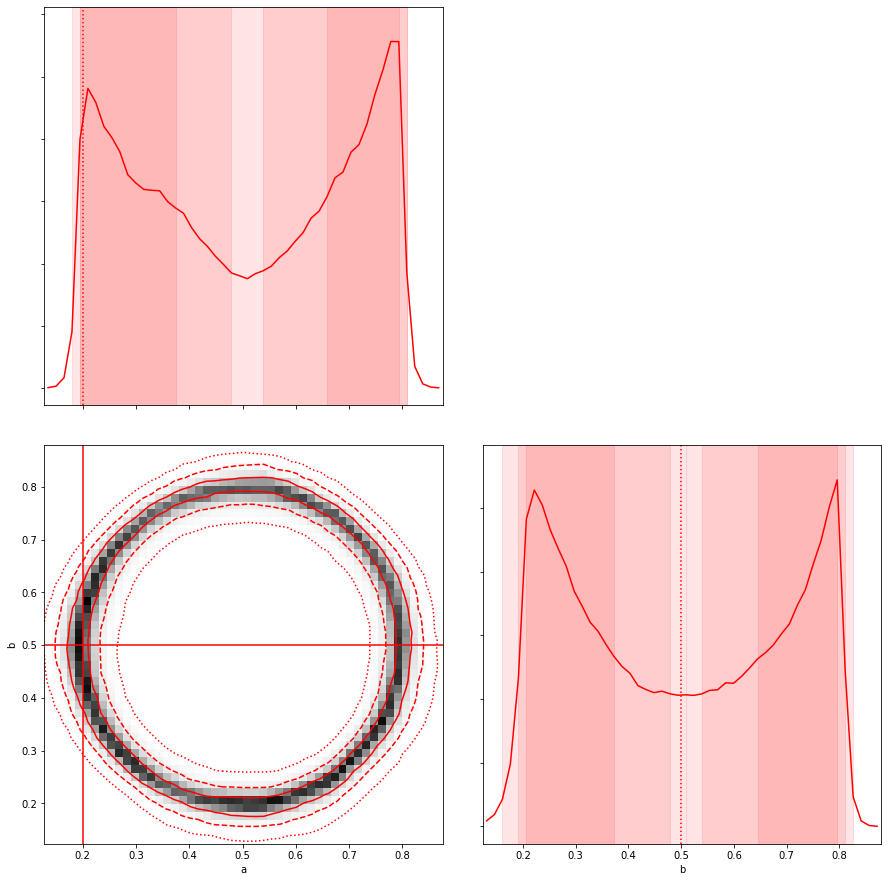

In [30]:
s.infer2d(N = 10000, 
          train_args = dict(batch_size=32, lr_schedule = [1e-3, 3e-4, 1e-4]),
          tail_args = dict(n_hidden = 256, p = 0.0, n_tail_features = 10, tail_features = False)
         )
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)